<a href="https://colab.research.google.com/github/niksinfinity/ML_AI_Notebooks/blob/master/Mnist_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
os.listdir('./sample_data')

['README.md',
 'anscombe.json',
 'mnist_train_small.csv',
 'california_housing_test.csv',
 'mnist_test.csv',
 'california_housing_train.csv']



---


**PreProcessing**

---



In [0]:
train_data = pd.read_csv('./sample_data/mnist_train_small.csv')
train_data.insert(0,'xo',1,True)
test_data = pd.read_csv('./sample_data/mnist_test.csv')


In [0]:
y = train_data['6']
x = train_data.loc[:,'0':]
x_train , x_cross , y_train , y_cross = train_test_split(x,y,test_size=0.28)

In [4]:
y.value_counts()

1    2243
7    2126
6    2038
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 6, dtype: int64

In [0]:
# from sklearn.preprocessing import PolynomialFeatures
# x_poly = PolynomialFeatures(degree=2,include_bias=False).fit_transform(x[:100])
# test_poly = PolynomialFeatures(degree=2,include_bias=False).fit_transform(test_data.loc[:100,'0':])
# # x_cross = PolynomialFeatures(degree=2,include_bias=False).fit_transform(x_cross)



---


**#Modelling Hypothesis**

---



In [0]:
model = LogisticRegression(fit_intercept=False,solver='saga',multi_class='ovr',n_jobs=-1,C=3)
#model.fit(x_train,y_train)



---


 **Learning Curve**

---



In [0]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve


cv = StratifiedKFold(10)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    model, cv=cv, train_sizes=sizes,
    scoring='f1_weighted',
)

viz.fit(x[:1000], y[:1000])
viz.poof()

---
**Evaluation** 

---


In [9]:
test_x = test_data.loc[:,'0':]
test_y= test_data.loc[:,'7']

model = LogisticRegression(fit_intercept=False,solver='saga',multi_class='ovr',n_jobs=-1,C=3,max_iter=100,penalty='l2')
model.fit(x,y)
pred_y = model.predict(test_x)
from sklearn.metrics import accuracy_score
#91.23912391239124
accuracy_score(test_y,pred_y)*100

91.23912391239124



---


**Visualising**

---



In [0]:
##PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# pca_x = pca.fit_transform(x)
#pca_test = pca.fit_transform(test_x)

In [0]:
##t-sne
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=3).fit_transform(x)

(19999,)

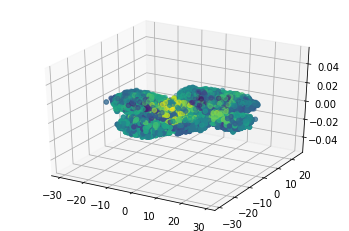

In [64]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
vis_x = x_embedded[:,0]
vis_y = x_embedded[:,1]
vis_z = x_embedded[:,2]
ax.scatter3D(vis_x,vis_y,c=vis_z, cmap='viridis');
x_embedded[:,1].shape